In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # makes the notebook fill the whole window

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from PIL import Image, ImageDraw
import os
import shutil

import FCM

from sklearn import preprocessing
from sklearn.cluster import KMeans

from mpl_toolkits.basemap import Basemap

%matplotlib inline
#Turn off interactive plotting for pyplot
plt.ioff()

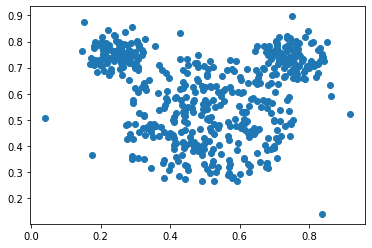

,X,Y,Loc
0,0.456601,0.432806,Head
1,0.611378,0.528625,Head
2,0.450299,0.711606,Head
3,0.639015,0.460744,Head
4,0.628957,0.323470,Head
...,...,...,...
495,0.151506,0.876586,Noise
496,0.860308,0.633833,Noise
497,0.862083,0.591805,Noise
498,0.916030,0.523391,Noise


In [2]:
mouse = pd.read_csv('./sample02.csv',sep=' ',names=['X','Y','Loc'])
plt.scatter(mouse['X'],mouse['Y'])
plt.show()
mouse

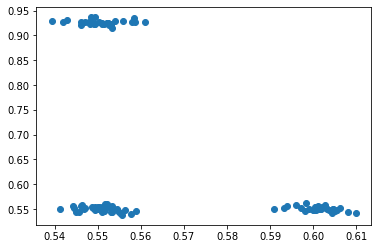

,X,Y
0,0.605470,0.547282
1,0.590862,0.549582
2,0.548940,0.551625
3,0.603320,0.550609
4,0.601743,0.550374
...,...,...
95,0.598390,0.562372
96,0.554804,0.545750
97,0.593299,0.552969
98,0.544953,0.544810


In [40]:
blobs = pd.read_csv('./sample01.csv',usecols=[1,2])
blobs.columns = ['X','Y']
plt.scatter(blobs['X'],blobs['Y'])
plt.show()
blobs

In [4]:
titanic = pd.read_csv('./titanic.csv').drop(columns=['Name','Ticket','Cabin']).dropna()
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x=='male' else 0)

le = preprocessing.LabelEncoder()
le.fit(titanic['Embarked'].unique())

titanic['Embarked'] = le.transform(titanic['Embarked'])
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250,1
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
889,890,1,1,1,26.0,0,0,30.0000,0


# Comparing Iris Data

In [5]:
def conv(x):
    if x == 2:
        return 'virignica'
    elif x == 1:
        return 'versicolor'
    elif x == 0:
        return 'setosa'

In [6]:
iris = pd.read_csv('./iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
fcm_iris = FCM.FCM(iris[['sepal_length','sepal_width','petal_length','petal_width']],3,4,maxiter=1000)

iris_centroids = fcm_iris.fit()

iris['FCM_Class'] = fcm_iris.classify()

iris['FCM_Class'] = iris['FCM_Class'].apply(conv)

In [8]:
KM = KMeans(3,max_iter=1000,tol=10e-7)

KM.fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])

iris['KMeans_Class'] = KM.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

iris['KMeans_Class'] = iris['KMeans_Class'].apply(conv)

In [9]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class,FCM_Class,KMeans_Class
0,5.1,3.5,1.4,0.2,setosa,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,virignica,virignica
146,6.3,2.5,5.0,1.9,virginica,versicolor,versicolor
147,6.5,3.0,5.2,2.0,virginica,virignica,virignica
148,6.2,3.4,5.4,2.3,virginica,virignica,virignica


In [10]:
sum(iris['class'] == iris['FCM_Class']) / 150,sum(iris['class'] == iris['KMeans_Class']) / 150

(0.6466666666666666, 0.6533333333333333)

In [11]:
display(KM.cluster_centers_)
display(fcm_iris._centroids)

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

,sepal_length,sepal_width,petal_length,petal_width
0,5.003561,3.403036,1.485002,0.251541
1,5.889200,2.761235,4.364255,1.397447
2,6.775119,3.052431,5.646914,2.053609


In [14]:
iris[iris['KMeans_Class'] != iris['FCM_Class']]

,sepal_length,sepal_width,petal_length,petal_width,class,FCM_Class,KMeans_Class
50,7.0,3.2,4.7,1.4,versicolor,virignica,versicolor
114,5.8,2.8,5.1,2.4,virginica,virignica,versicolor


# Comparing Titanic Data

In [19]:
titanic.drop(columns='Survived')

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,886,3,0,39.0,0,5,29.1250,1
886,887,2,1,27.0,0,0,13.0000,2
887,888,1,0,19.0,0,0,30.0000,2
889,890,1,1,26.0,0,0,30.0000,0


In [20]:
fcm_titanic = FCM.FCM(titanic.drop(columns='Survived'),2,8,maxiter=100)
fcm_titanic.fit()
titanic['FCM_Class'] = fcm_titanic.classify()

In [21]:
KM = KMeans(2,max_iter=1000,tol=10e-7)
KM.fit(titanic.drop(columns='Survived'))
titanic['KMeans_Class'] = KM.predict(titanic.drop(columns='Survived'))

In [29]:
titanic['FCM_Class'] = titanic['FCM_Class'].apply(lambda x: 0 if x== 1 else 1)

In [30]:
sum(titanic['Survived'] == titanic['FCM_Class']) / 712,sum(titanic['Survived'] == titanic['KMeans_Class']) / 712

(0.49157303370786515, 0.49157303370786515)

In [32]:
titanic[titanic['KMeans_Class'] != titanic['FCM_Class']]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FCM_Class,KMeans_Class
449,450,1,1,1,52.0,0,0,30.50,2,0,1
450,451,0,2,1,36.0,1,2,27.75,2,0,1


In [34]:
KM.cluster_centers_

array([6.77085714e+02, 2.20571429e+00, 6.54285714e-01, 3.07640571e+01,
       4.62857143e-01, 4.11428571e-01, 3.42564403e+01, 1.58285714e+00,
       1.00000000e+00])

In [39]:
fcm_titanic._centroids

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,212.772440,2.291844,0.632801,28.855413,0.555317,0.423449,32.256427,1.601133
1,685.588194,2.226659,0.656049,30.313543,0.473042,0.429438,32.840069,1.605406


In [37]:
for ele in fcm_titanic._A:
    print(ele)

[0.91159369 0.08840631]
[0.91058594 0.08941406]
[0.91273771 0.08726229]
[0.91344654 0.08655346]
[0.91372818 0.08627182]
[0.91409646 0.08590354]
[0.91491624 0.08508376]
[0.91608594 0.08391406]
[0.91698386 0.08301614]
[0.91645153 0.08354847]
[0.9169008 0.0830992]
[0.91781041 0.08218959]
[0.91923601 0.08076399]
[0.91859195 0.08140805]
[0.91886385 0.08113615]
[0.9197572 0.0802428]
[0.92171773 0.07828227]
[0.92299555 0.07700445]
[0.92295612 0.07704388]
[0.92280966 0.07719034]
[0.92469037 0.07530963]
[0.92423374 0.07576626]
[0.92557276 0.07442724]
[0.84731742 0.15268258]
[0.92812741 0.07187259]
[0.92651696 0.07348304]
[0.92583878 0.07416122]
[0.92997021 0.07002979]
[0.93087392 0.06912608]
[0.93201982 0.06798018]
[0.93188857 0.06811143]
[0.93244148 0.06755852]
[0.93396994 0.06603006]
[0.93379059 0.06620941]
[0.93444498 0.06555502]
[0.9377906 0.0622094]
[0.93787255 0.06212745]
[0.93815841 0.06184159]
[0.93513429 0.06486571]
[0.94047915 0.05952085]
[0.93653246 0.06346754]
[0.94102123 0.05897877

# Comparison on Mouse

In [42]:
fcm_mouse = FCM.FCM(mouse.drop(columns='Loc'),4,2,maxiter=100)
fcm_mouse.fit()
mouse['FCM_Class'] = fcm_mouse.classify()

In [43]:
KM = KMeans(4,max_iter=1000,tol=10e-7)
KM.fit(mouse.drop(columns='Loc'))
mouse['KMeans_Class'] = KM.predict(mouse.drop(columns='Loc'))

In [44]:
mouse

,X,Y,Loc,FCM_Class,KMeans_Class
0,0.456601,0.432806,Head,0,1
1,0.611378,0.528625,Head,2,0
2,0.450299,0.711606,Head,3,2
3,0.639015,0.460744,Head,2,0
4,0.628957,0.323470,Head,2,0
...,...,...,...,...,...
495,0.151506,0.876586,Noise,3,2
496,0.860308,0.633833,Noise,1,3
497,0.862083,0.591805,Noise,1,3
498,0.916030,0.523391,Noise,1,3


In [45]:
display(fcm_mouse._centroids)

,X,Y
0,0.419695,0.473042
1,0.734400,0.726567
2,0.612799,0.442429
3,0.257825,0.743498


In [46]:
display(KM.cluster_centers_)

array([[ 6.20317685e-01,  4.39143139e-01,  2.00000000e+00],
       [ 4.20737230e-01,  4.83310777e-01, -4.88498131e-15],
       [ 2.69807911e-01,  7.39620005e-01,  3.00000000e+00],
       [ 7.26414475e-01,  7.23197818e-01,  1.00000000e+00]])

In [48]:
def converto(x):
    if x == 0:
        return 1
    elif x == 1:
        return 3
    elif x == 2:
        return 0
    elif x == 3:
        return 2

In [49]:
mouse['FCM_Class'] = mouse['FCM_Class'].apply(converto)

In [51]:
mouse[mouse['KMeans_Class'] != mouse['FCM_Class']] # Means everything agrees

,X,Y,Loc,FCM_Class,KMeans_Class


In [53]:
for ele in fcm_mouse._A:
    print(ele)

[0.86068381 0.01569521 0.10476158 0.0188594 ]
[0.13650521 0.10010462 0.73162507 0.0317651 ]
[0.2617996  0.18711953 0.15319147 0.39788941]
[0.02040795 0.01234612 0.96287431 0.00437162]
[0.16175036 0.06164393 0.7425413  0.03406441]
[0.27846013 0.0700548  0.60047104 0.05101404]
[0.27096856 0.06775548 0.61249003 0.04878593]
[0.86539697 0.0165324  0.09601824 0.02205239]
[0.25398894 0.04156509 0.67390588 0.03054009]
[0.78131433 0.03934701 0.11367145 0.06566721]
[0.53822723 0.05006606 0.37106553 0.04064118]
[0.51145152 0.0767047  0.13031395 0.28152983]
[0.42785944 0.13439087 0.34457637 0.09317332]
[0.09640878 0.10417447 0.77081647 0.02860028]
[0.2672526  0.04941235 0.07550751 0.60782754]
[0.58114757 0.03277498 0.35588887 0.03018858]
[0.63807843 0.04979662 0.11678503 0.19533993]
[0.79511215 0.03244867 0.08054165 0.09189753]
[0.53758259 0.06551389 0.3169263  0.07997723]
[0.36636601 0.05674832 0.52882253 0.04806314]
[0.58297201 0.05221523 0.30342349 0.06138927]
[0.96462278 0.00511547 0.02115716 